### A * algorithm
Our assumed heuristic function should give a good estimate of the cost of reaching a the destined 
goal, this estimate should provide a reasonable estimate of the cost depending on prior 
knowledge of the environment and its setting.
In the case of our drone delivery problem the Euclidean distance, that is the the straight-line 
distance between the two points should give us a good estimate of the cost giving the fact that it 
assumes that the drone can move in any direction and has no restrictions on its movement.
So given a map of the neighborhood where the warehouse and five selling points are, we could 
measure the straight line distance between each location and the goal where the goal is dynamic 
in this case.

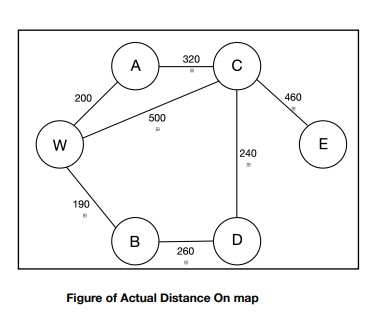

Assuming our goal destination at some point is reaching selling point E, the figure to the left 
demonstrates the distance between the warehouse and selling points on the map


















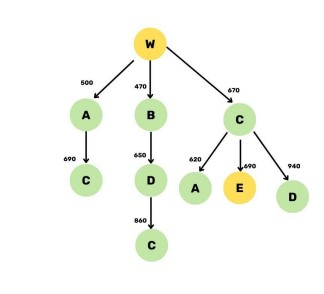

This figure demonstrates the Euclidean distance (straight line distance) between each location 
and the goal location with is selling point E, and the total cost will be calculated as the 
combination of the actual distance and the Euclidean distance :
### F(n) = E(n) + H(n) 
Where of course the Euclidean distance is calculated for each goal state.

In [1]:
import tkinter as tk
from tkinter import ttk
import heapq

# Define the graph as a dictionary of nodes and their neighbors with edge costs
graph = {
    'W': {'A': 200, 'B': 190, 'C': 500},
    'A': {'C': 320},
    'B': {'D': 260},
    'D': {'C': 240},
    'C': {'E': 460},
    'E':{}
}

coordinates = {
    'W': (50, 50),
    'A': (150, 50),
    'B': (50, 150),
    'C': (250, 150),
    'D': (150, 250),
    'E': (250, 250)
}


# Define a function to calculate the heuristic value for a given node
def heuristic(node, goal):
    # In this example, we use a simple heuristic that estimates the distance between two nodes as the number of nodes
    # between them
    x1, y1 = coordinates[node]
    x2, y2 = coordinates[goal]
    return int(((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5)


# Define the A* algorithm function
def astar(start, goal):
    # Create empty dictionaries to store the cost from the start node and the parent of each node
    g = {start: 0}
    parent = {start: None}

    # Create an empty heap and add the start node with a priority of 0
    heap = []
    heapq.heappush(heap, (0, start))

    # Loop until the heap is empty
    while heap:
        # Pop the node with the lowest cost from the heap
        current_cost, current_node = heapq.heappop(heap)

        # If we have reached the goal node, construct the path and return it
        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            path.reverse()
            return path

        # Otherwise, loop through the neighbors of the current node
        for neighbor, cost in graph[current_node].items():
            # Calculate the cost from the start node to this neighbor through the current node
            new_cost = g[current_node] + cost

            # If this neighbor has not been visited yet or the new cost is lower than the existing cost, update the
            # cost and parent
            if neighbor not in g or new_cost < g[neighbor]:
                g[neighbor] = new_cost
                parent[neighbor] = current_node
                f = new_cost + heuristic(neighbor, goal)
                heapq.heappush(heap, (f, neighbor))

    # If we have exhausted all possible paths and haven't found the goal, return None
    return None


In [2]:
def run_astar():
    start = start_var.get()
    goal = goal_var.get()
    path = astar(start, goal)
    if path is not None:
        path_text.set(' -> '.join(path))
        cost_text.set(str(calculate_path_cost(path)))
        print('Optimal path:', ' -> '.join(path))
        print('Total cost:', calculate_path_cost(path))
        redraw_graph(path)
    else:
        path_text.set('No path found')
        cost_text.set('')
        print('No path found')

def calculate_path_cost(path):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i+1]]
    return cost

def redraw_graph(path=None):
    # Clear the canvas
    canvas.delete('all')

    # Draw the nodes and edges on the canvas
    for node, coords in coordinates.items():
        x, y = coords
        canvas.create_oval(x - 10, y - 10, x + 10, y + 10, fill='#d9e6f2')
        canvas.create_text(x, y, text=node, fill='#333333')

    for node, edges in graph.items():
        x1, y1 = coordinates[node]
        for neighbor, cost in edges.items():
            x2, y2 = coordinates[neighbor]
            if path and ((node, neighbor) in path or (neighbor, node) in path):
                canvas.create_line_with_arrow(x1, y1, x2, y2, arrow='last', arrowshape=(8, 10, 3), fill='#e91e63', width=3)
            else:
                canvas.create_line(x1, y1, x2, y2, fill='#333333', width=2)

# Define a custom function to create a line with an arrow on the canvas
def create_line_with_arrow(self, x1, y1, x2, y2, **kwargs):
    self.create_line(x1, y1, x2, y2, **kwargs)
    dx = x2 - x1
    dy = y2 - y1
    angle = tk.atan2(dy, dx)
    arrow_len = 12
    arrow_x = x2 - arrow_len * tk.cos(angle)
    arrow_y = y2 - arrow_len * tk.sin(angle)
    self.create_line(x2, y2, arrow_x, arrow_y, **kwargs)


# Add the custom function to the Canvas class
tk.Canvas.create_line_with_arrow = create_line_with_arrow


# Create the root window and title it
root = tk.Tk()
root.title('A* Algorithm')

# Define the colors for the GUI
root.configure(bg='#d9e6f2')
ttk.Style().configure('TLabel', background='#d9e6f2', foreground='#333333')
ttk.Style().configure('TCombobox', background='#ffffff', foreground='#333333')
ttk.Style().configure('TButton', background='#e91e63', foreground='#ffffff')
ttk.Style().configure('TEntry', background='#ffffff', foreground='#333333')

# Create the GUI widgets and place them in the window
start_label = ttk.Label(root, text='Start Node:')
start_label.grid(column=0, row=0, padx=5, pady=5)
start_var = tk.StringVar()
start_dropdown = ttk.Combobox(root, textvariable=start_var, values=list(graph.keys()))
start_dropdown.grid(column=1, row=0, padx=5, pady=5)
start_dropdown.current(0)

goal_label = ttk.Label(root, text='Goal Node:')
goal_label.grid(column=0, row=1, padx=5, pady=5)
goal_var = tk.StringVar()
goal_dropdown = ttk.Combobox(root, textvariable=goal_var, values=list(graph.keys()))
goal_dropdown.grid(column=1, row=1, padx=5, pady=5)
goal_dropdown.current(4)

run_button = ttk.Button(root, text='Run A*', command=run_astar)
run_button.grid(column=0, row=2, columnspan=2, padx=5, pady=5)

path_label = ttk.Label(root, text='Optimal Path:')
path_label.grid(column=0, row=3, padx=5, pady=5)
path_text = tk.StringVar()
path_text.set('')
path_entry = ttk.Entry(root, textvariable=path_text)
path_entry.grid(column=1, row=3, padx=5, pady=5)

cost_label = ttk.Label(root, text='Total Cost:')
cost_label.grid(column=0, row=4, padx=5, pady=5)
cost_text = tk.StringVar()
cost_text.set('')
cost_entry = ttk.Entry(root, textvariable=cost_text)
cost_entry.grid(column=1, row=4, padx=5, pady=5)

canvas = tk.Canvas(root, width=350, height=350, bg='#ffffff')
canvas.grid(column=2, row=0, rowspan=5, padx=5, pady=5)

# Draw the initial graph on the canvas
redraw_graph()

# Start the main event loop
root.mainloop()

Optimal path: W -> C
Total cost: 500
